In [14]:
from poisson_sprinkling import *

In [15]:
L = 1
T = 5
l = 0.5 * T #np.sqrt(2) / 2 * L #0.5
h = l / 2**0.5
rho = 5
print(h)

1.7677669529663687


In [16]:
points = poisson_sprinkle_rectangular(rho, xlims = [0, L], tlims=[0, T])
relations = find_relations_cylinder(points, L)

In [17]:
point_subset, x_c, t_c = aleksandrov_interval_sample(points, l, L, T)
print(point_subset)
print(x_c, t_c)

{3, 5, 6, 7, 8, 9, 10, 11, 12}
0.6105605701649985 1.7899711776095373


In [18]:
links = causal_links(points, relations)

In [19]:
position_subset = generate_position_subset(points, point_subset)
relations_subset = generate_relations_subset(relations, point_subset)

In [20]:
print(point_subset)
print(relations_subset)

{3, 5, 6, 7, 8, 9, 10, 11, 12}
{3: [6, 7, 8, 9, 10, 11, 12], 5: [7, 8, 9, 10, 11, 12], 6: [8, 9, 10, 11, 12], 7: [8, 9, 10, 11, 12], 8: [9, 10, 11, 12], 9: [11, 12], 10: [], 11: [12], 12: []}


In [21]:
# plt.rcParams["figure.figsize"] = 10, 10

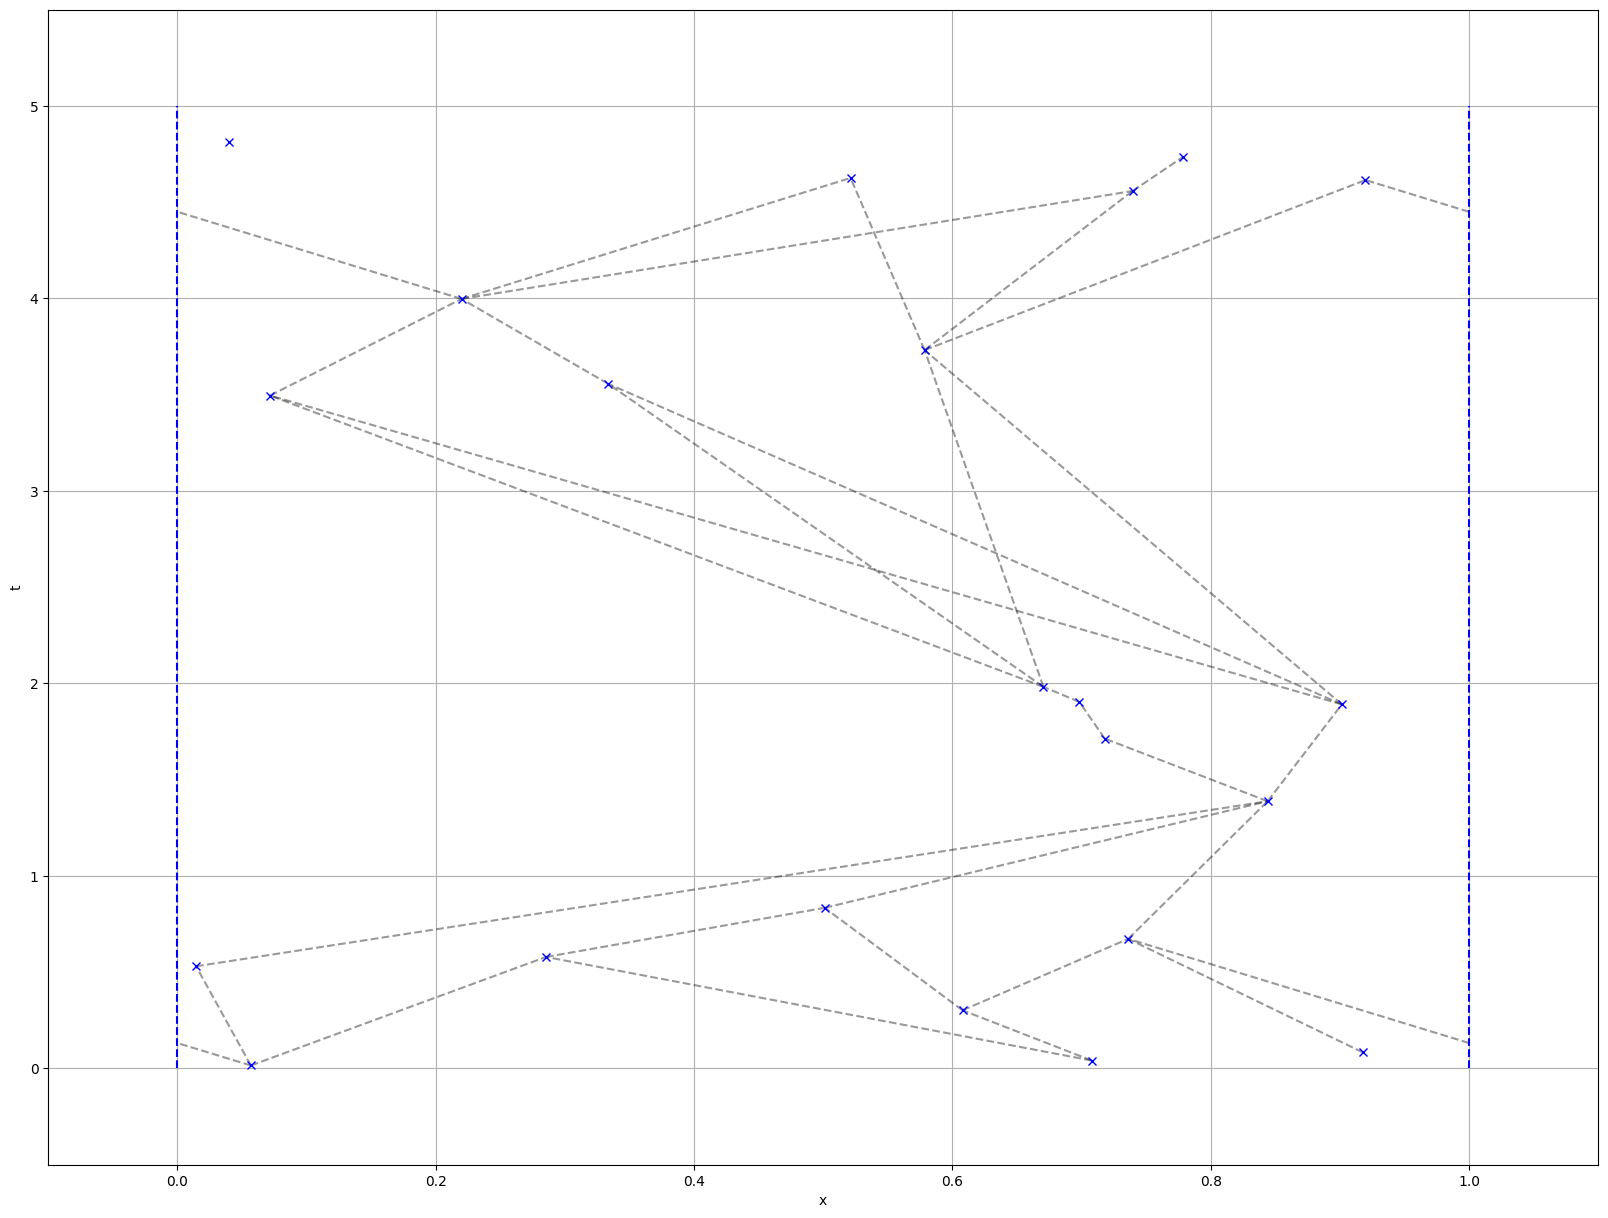

In [22]:
plot_links_cylinder_periodic(points[:,0], points[:,1], links, L, T)

Text(0, 0.5, 't')

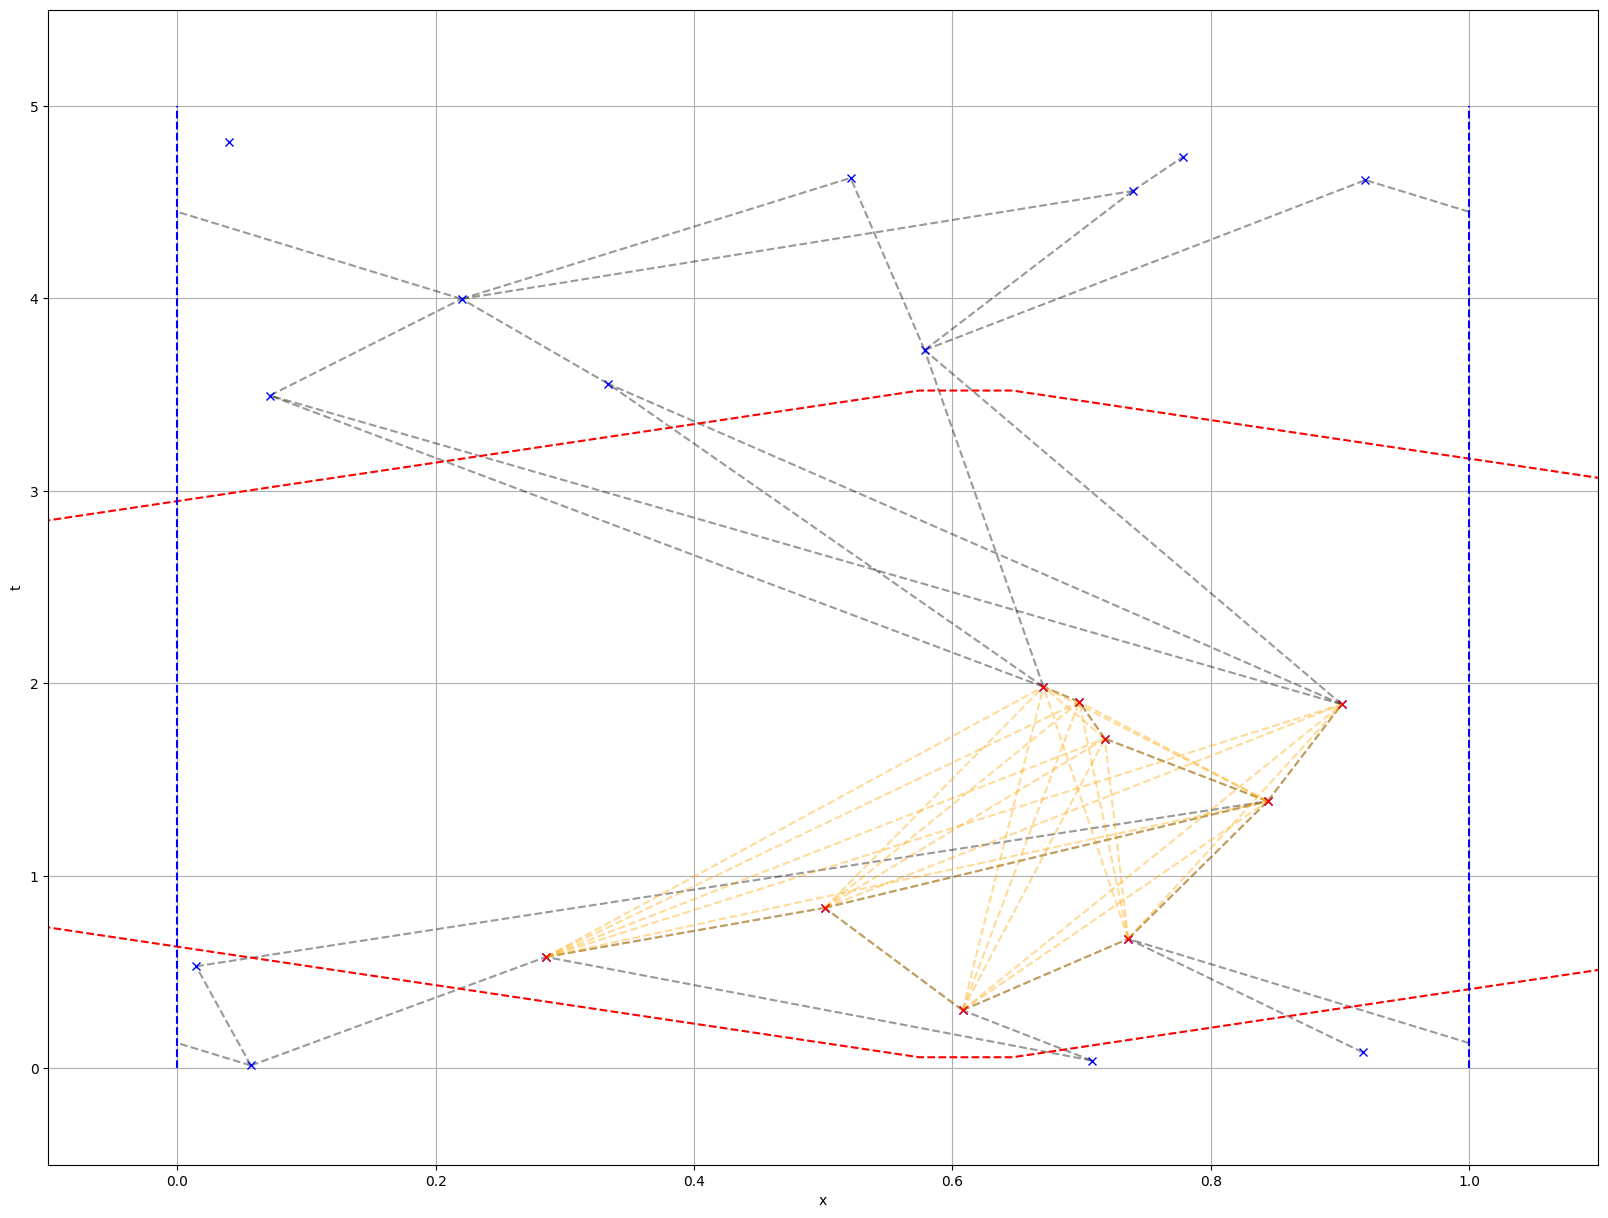

In [23]:
x = points[:,0]
t = points[:,1]

for i in range(len(links)):
    for j in links[i]:
        xi, xj = x[i], x[j]
        ti, tj = t[i], t[j]
        periodic_cylinder_link(xi, ti, xj, tj, L, "black", "o--")

# for i in range(len(x)):
plt.plot(x, t, "x", c = "blue")

xs = position_subset[:,0]
ts = position_subset[:,1]

for i in relations_subset:
    for j in relations_subset[i]:
        xi, xj = x[i], x[j]
        ti, tj = t[i], t[j]
        periodic_cylinder_link(xi, ti, xj, tj, L, "orange", "o--")

plt.plot(xs, ts, "x", c = "red")

interval_xs = np.linspace(x_c - h, x_c + h, 50)
max_ts = [max_boundary(interval_xs[i], x_c, t_c, h) for i in range(len(interval_xs))]
min_ts = [min_boundary(interval_xs[i], x_c, t_c, h) for i in range(len(interval_xs))]

plt.plot(interval_xs, max_ts, "ro--",  markersize = 0)
plt.plot(interval_xs, min_ts, "ro--",  markersize = 0)

# Cylinder Boundaries
plt.plot((0, 0), (0, T), "bo--",  markersize = 0)
plt.plot((L, L), (0, T), "bo--",  markersize = 0)

plt.grid()
plt.xlim(-0.1 * L, 1.1 * L)
plt.ylim(-0.1 * T, 1.1 * T)

plt.xlabel("x")
plt.ylabel("t")

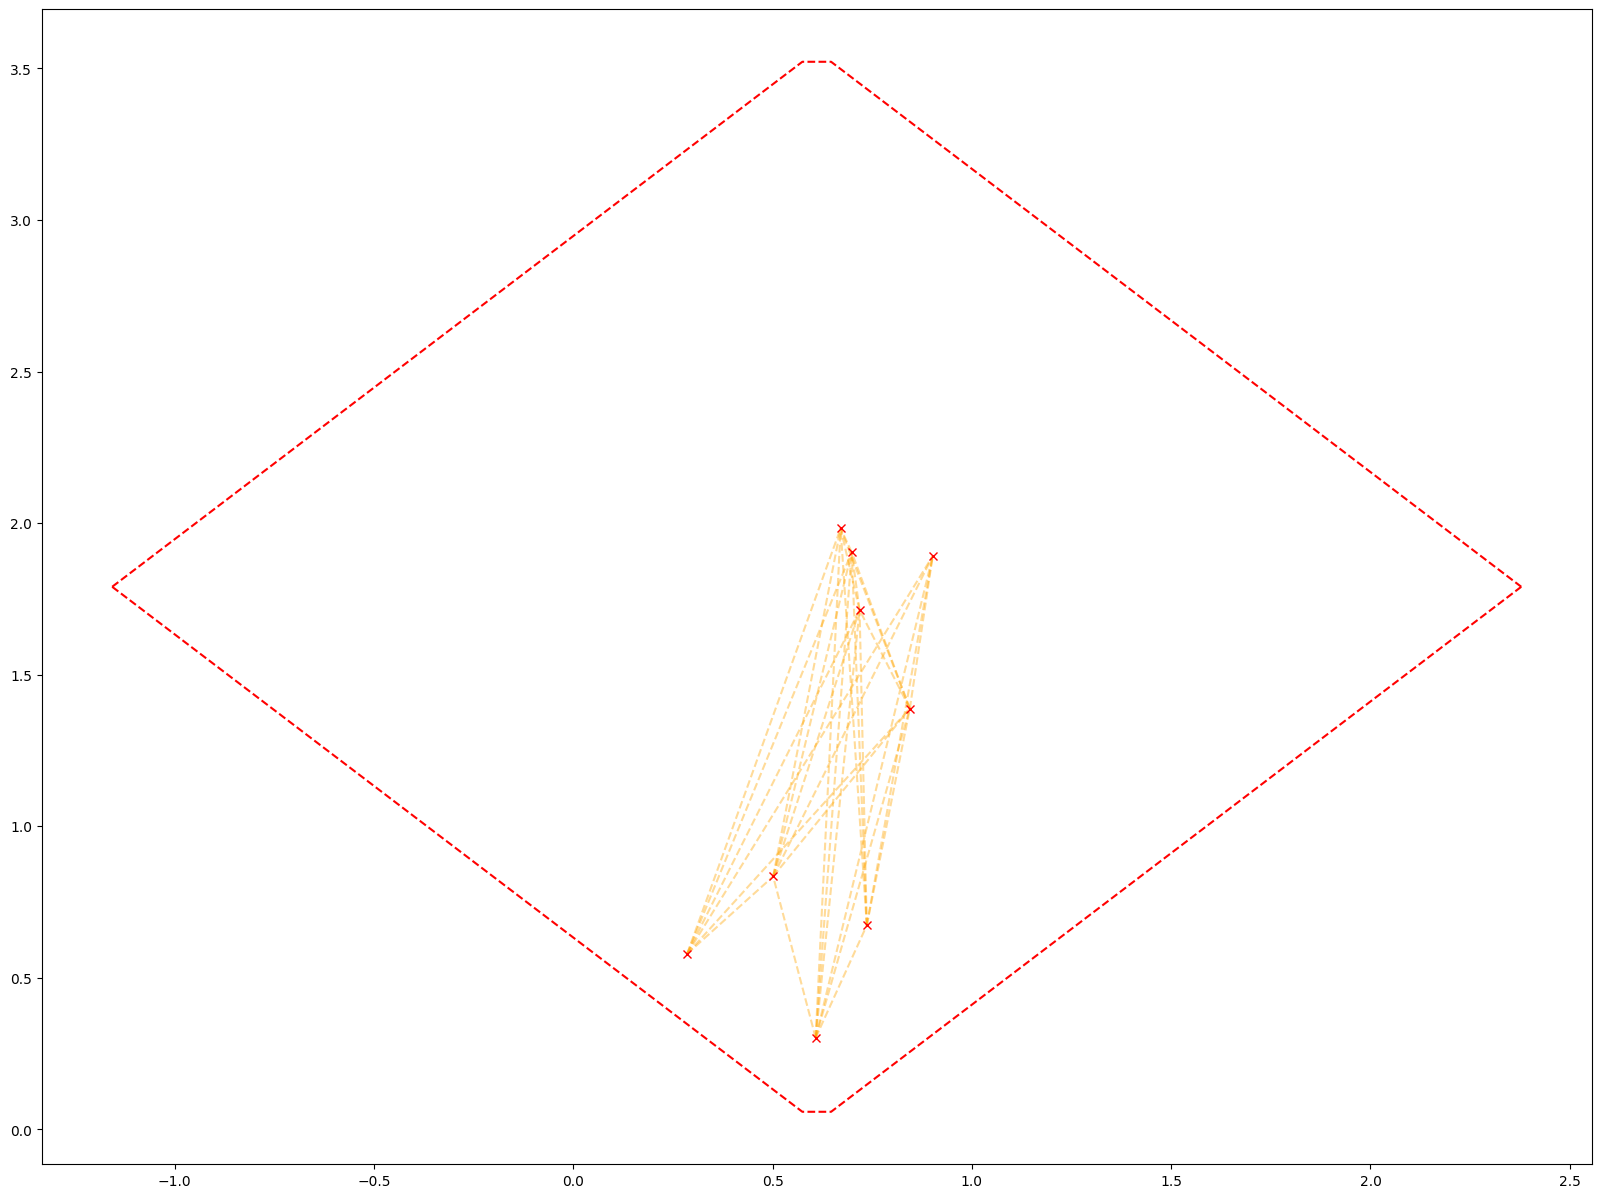

In [24]:
for i in relations_subset:
    for j in relations_subset[i]:
        xi, xj = x[i], x[j]
        ti, tj = t[i], t[j]
        periodic_cylinder_link(xi, ti, xj, tj, L, "orange", "o--")

plt.rcParams["figure.figsize"] = 20, 15

# for i in range(len(xs)):
plt.plot(xs, ts, "x", c = "red")
plt.plot(interval_xs, max_ts, "ro--",  markersize = 0)
plt.plot(interval_xs, min_ts, "ro--",  markersize = 0)

In [25]:
l**2 * rho #Beautiful

31.25